In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
from opt_flow import *
import sys, os
# from __future__ import unicode_literals
import numpy as np
import cv2
import time
import argparse
import pyflow   #install it by doing: pip install ./pyflow
from src.compute_flow_pyflow import *

In [ ]:
def optical_flow_metrics_pred(filename_pred, filename_gt):
    
    dataset_flow_path_gt = '../datasets/data_stereo_flow/training/flow_noc/'
    filename_path_gt = dataset_flow_path_gt + filename_gt

    if type(filename_pred) is str:
        
        dataset_flow_path_pred = '../datasets/results/'
        filename_path_pred = dataset_flow_path_pred + filename_pred
        u_pred, v_pred, valid_data_pred = read_kitti_flow(filename_path_pred)
    else:
        u_pred = filename_pred[:,:,0]
        v_pred = filename_pred[:,:,1]
        valid_data_pred = filename_pred[:,:,2]

    u_gt, v_gt, valid_data_gt = read_kitti_flow(filename_path_gt)
    u_gt = u_gt * valid_data_gt
    v_gt = v_gt * valid_data_gt

    u_pred = u_pred * valid_data_pred
    v_pred = v_pred * valid_data_pred

    msen, msen_distances = MSEN(u_pred, v_pred, u_gt, v_gt, valid_data_gt)
    pepn, pepn_distances = PEPN(u_pred, v_pred, u_gt, v_gt, valid_data_gt)
    
    print('MSEN for image', filename_gt + ":", round(msen,4))
    print('PEPN for image', filename_gt + ":", str(round(pepn,4)) + "%")
    return msen_distances, pepn_distances, valid_data_gt

In [ ]:
dataset_path =   '../datasets/data_stereo_flow/training/image_0/'

im1_path = dataset_path+'000045_10.png'
im2_path =dataset_path+ '000045_11.png'
#im1_path = 'pyflow/examples/car1.jpg'
#im2_path = 'pyflow/examples/car2.jpg'

sys.__stdout__ = sys.stdout
sys.stdout = open(os.devnull, 'w')

im1 = cv2.imread(im1_path)
im2 = cv2.imread(im2_path)
optical_flow = compute_OF_pyflow(im1, im2)
u = optical_flow[:,:,0]
v = optical_flow[:,:,1]

sys.stdout = sys.__stdout__
        



In [3]:

msen, pepn, _ = optical_flow_metrics_pred(optical_flow, '000045_10.png')

MSEN for image 000045_10.png: 0.9567
PEPN for image 000045_10.png: 7.8798%


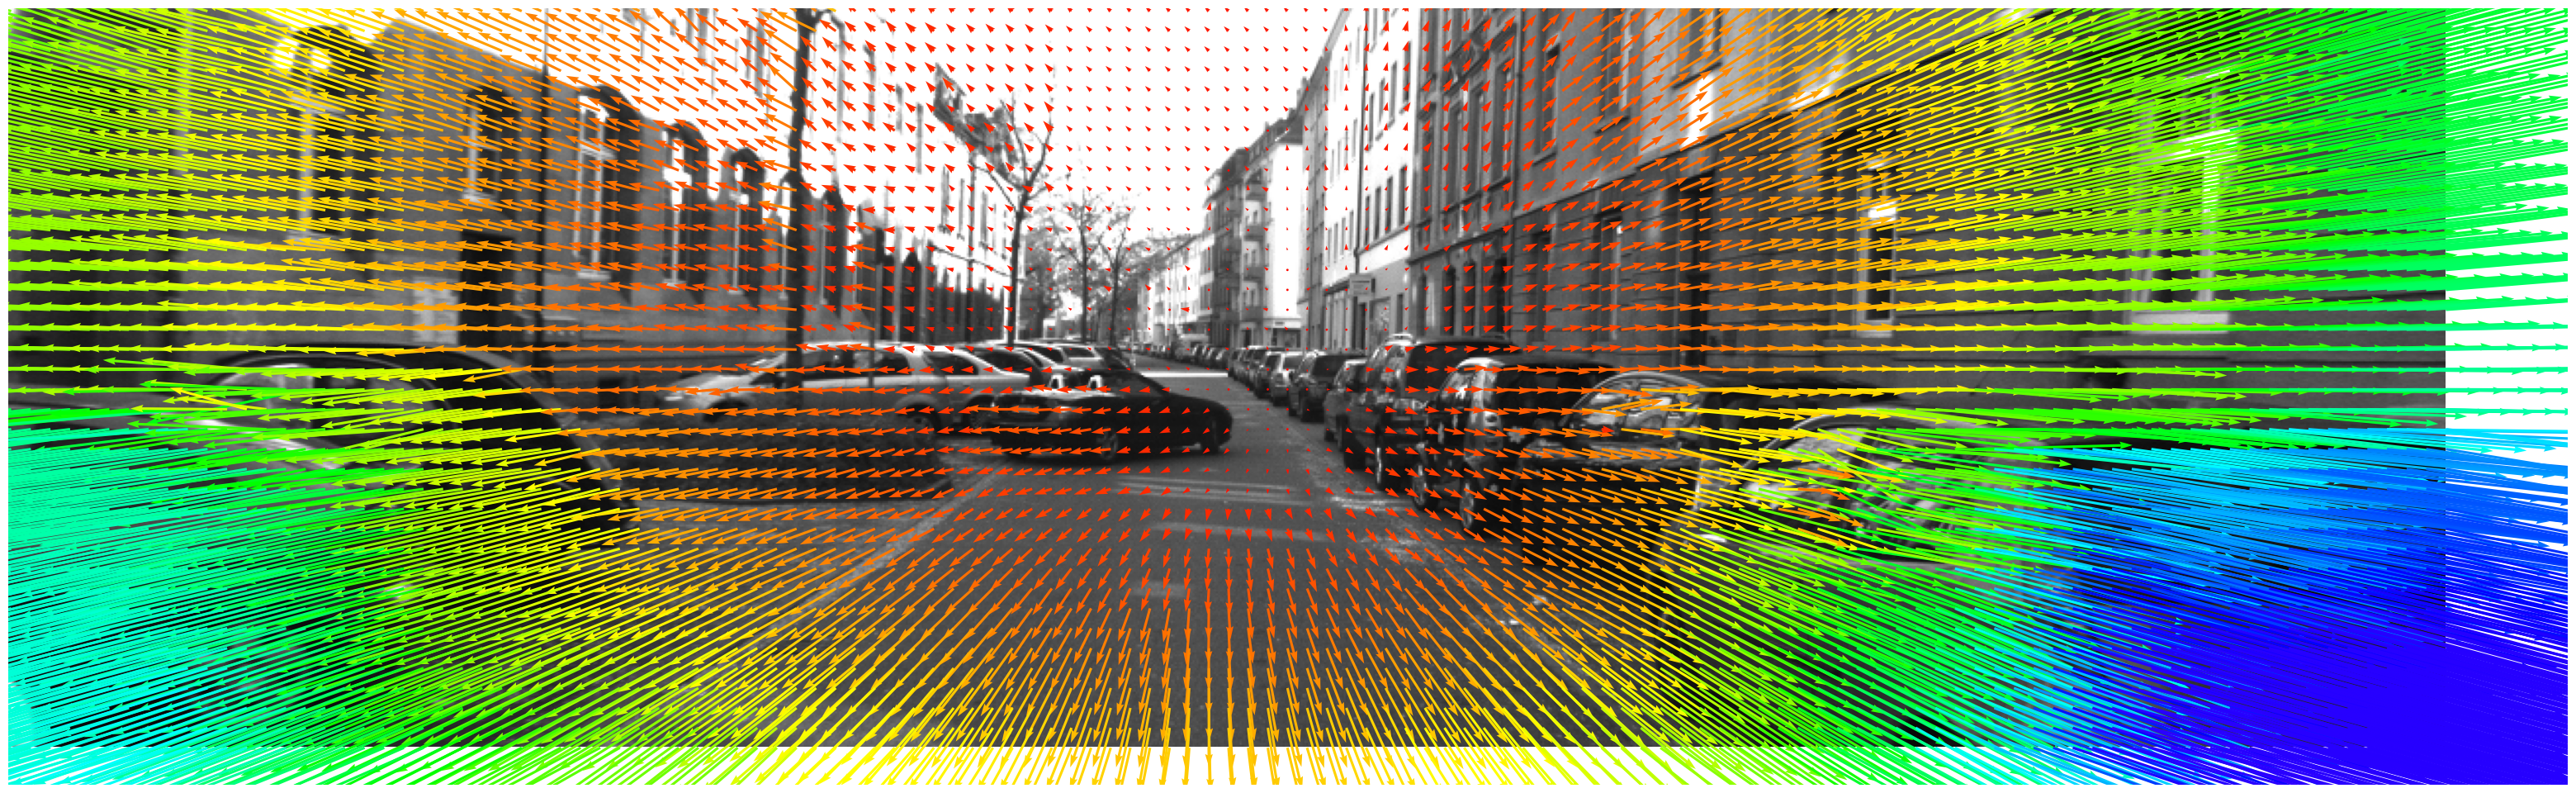

<Figure size 640x480 with 0 Axes>

In [4]:

plot_optical_flow_color(u,v,im1,'./Results/outFlow_arrowplot.png')

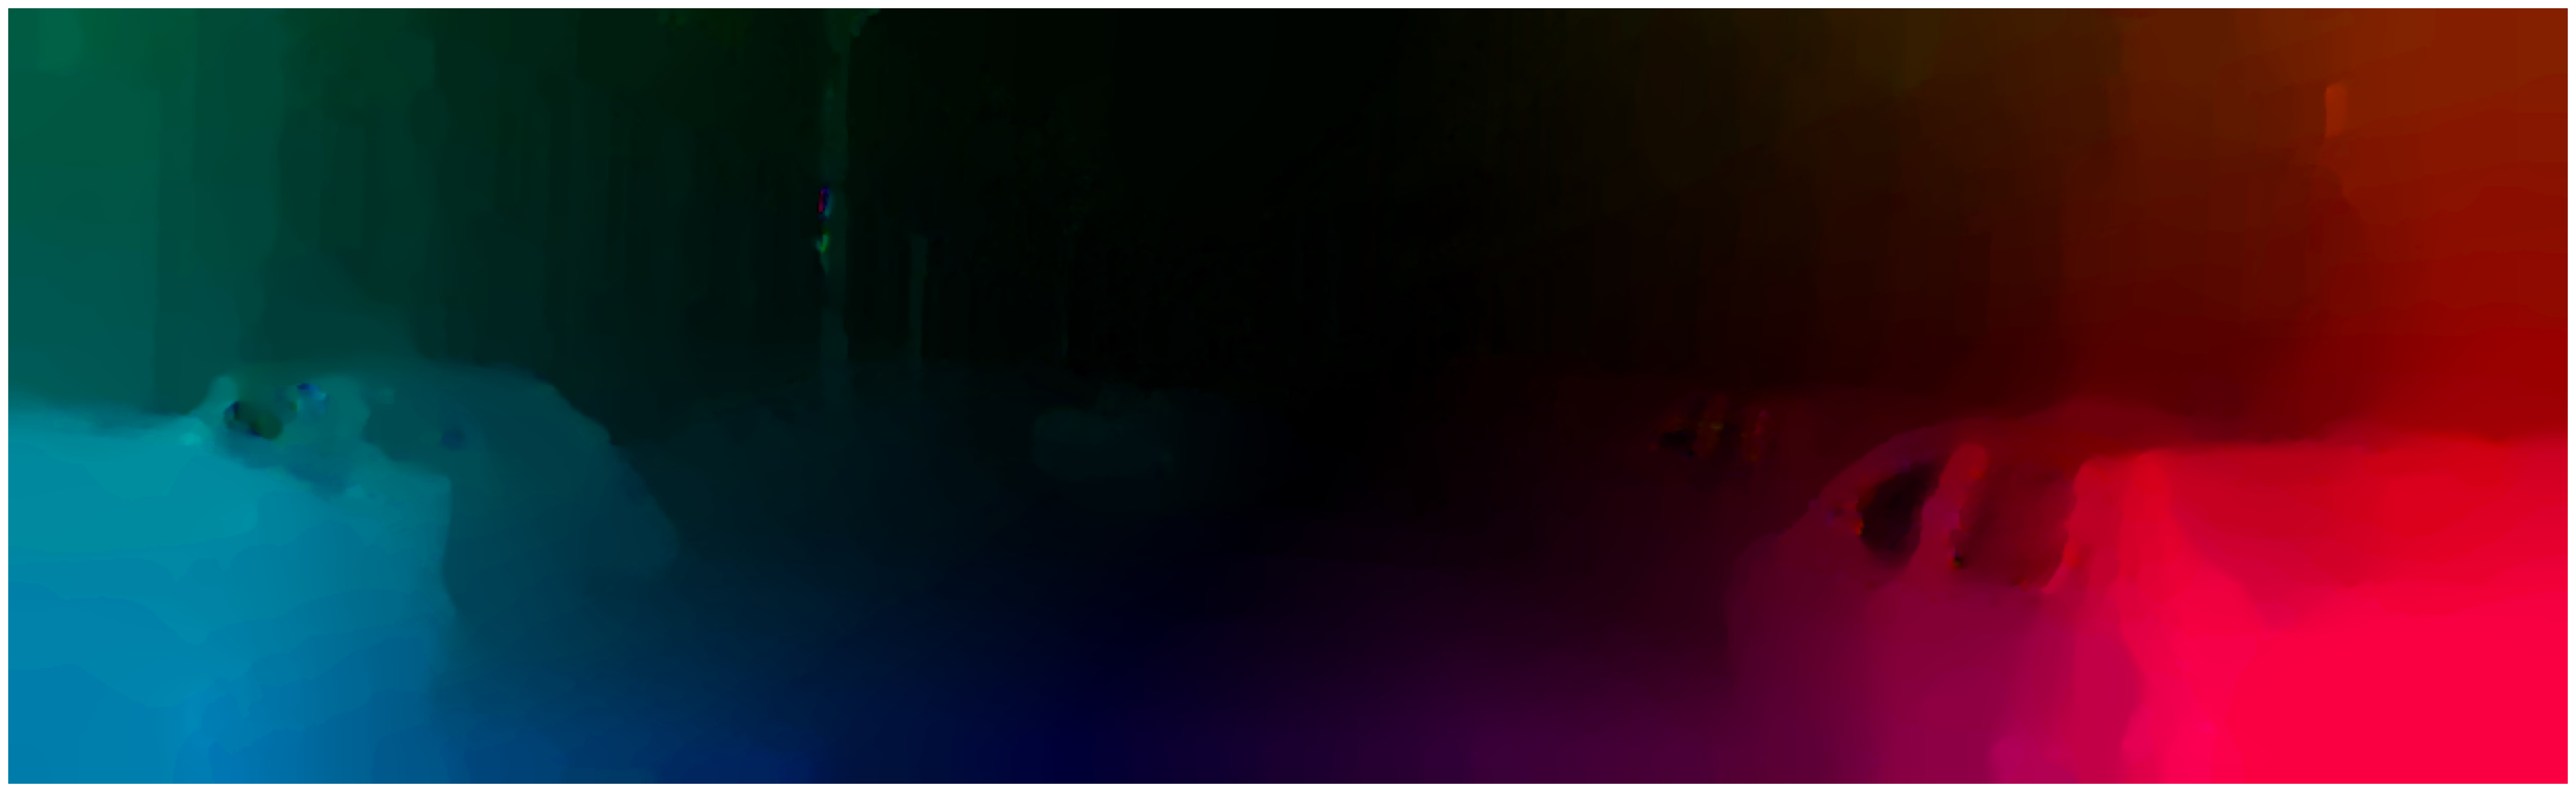

In [5]:

plot_optical_flow_dense(u,v,im1,'./Results/outFlow_arrowplot.png')